# Life Expectancy and Alcohol Consumption

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [174]:
df_beer = pd.read_csv('data/beer/beer.csv')
df_life = pd.read_csv('data/beer/life_expectancy.csv')
df_alcohol = pd.read_csv('data/beer/alcohol.csv')

In [18]:
df_beer.head()

,Global rank[1],Country,Consumption per capita(litres),2015–2016 change (litres),Total national consumption (106 L),Year
0,1.0,Czech Republic,143.3,0.9,1959.0,2016.0
1,2.0,Namibia,108.0,5.3,270.0,2016.0
2,3.0,Austria,106.0,0.0,928.0,2016.0
3,4.0,Germany,104.2,-0.5,8412.0,2016.0
4,5.0,Poland,100.8,1.8,3892.0,2016.0


In [20]:
df_life.head()

,Country and regions,Both sexes rank,Both sexes life expectancy,Female rank,Female life expectancy,Male rank,Male life expectancy,Both sexes rank (HALE),Both sexes life expectancy (HALE)
0,Japan,1,83.7,1,86.8,6,80.5,1,74.9
1,Switzerland,2,83.4,6,85.3,1,81.3,4,73.1
2,Singapore,3,83.1,2,86.1,10,80.0,2,73.9
3,Australia,4,82.8,7,84.8,3,80.9,15,71.9
4,Spain,4,82.8,3,85.5,9,80.1,9,72.4


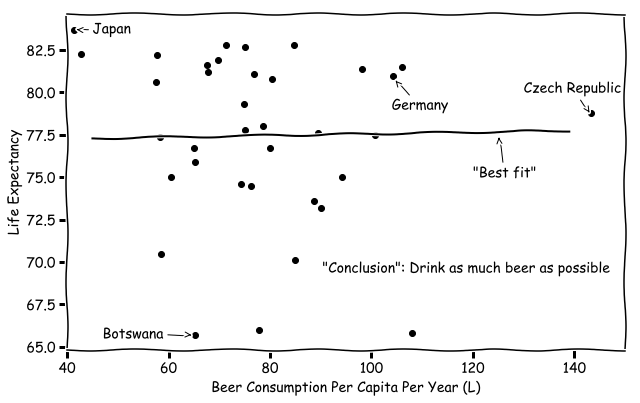

In [260]:
df_ori = pd.merge(df_beer, df_life, how='left', left_on='Country', right_on='Country and regions')


df = df_ori.dropna()

#df.head()

df.sort_values(by='Both sexes life expectancy', ascending=True).head()

x = np.arange(45,140)
x_data = df['Consumption per capita(litres)'].values
y_data = df['Both sexes life expectancy'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
#m,b = np.polyfit(x_data, y_data, 1)

def fit(x):
    return slope * (x ) + intercept


with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure(figsize=(10,6.18))
    plt.scatter( x_data, y_data, color='k' )
    plt.plot( x, fit(x) ,color='k' )
#    df.plot.scatter(x='Consumption per capita(litres)', y='Both sexes life expectancy')

    plt.xlim([40, 150])
    
    plt.annotate('Germany', xy=(104.4, 80.8), arrowprops=dict(arrowstyle='->'), xytext=(104, 79))
    plt.annotate('Czech Republic', xy=(143.3, 78.7), arrowprops=dict(arrowstyle='->'), xytext=(130, 80))
    plt.annotate('Japan', xy=(41.4, 83.7), arrowprops=dict(arrowstyle='->'), xytext=(45, 83.5))
    plt.annotate('Botswana', xy=(65, 65.7), arrowprops=dict(arrowstyle='->'), xytext=(47, 65.5))
    plt.annotate('"Best fit"', xy=(125, 77.5), arrowprops=dict(arrowstyle='->'), xytext=(120, 75))

    plt.xlabel('Beer Consumption Per Capita Per Year (L)')
    plt.ylabel('Life Expectancy')
    fig.text( 0.68, 0.3, '"Conclusion": Drink as much beer as possible', color = 'k',  ha='center')



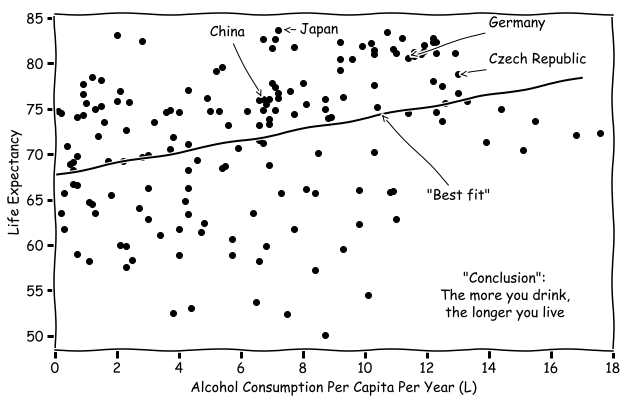

In [263]:
df_alco_ori = pd.merge(df_alcohol, df_life, how='left', left_on='Country', right_on='Country and regions')
#df_alco_ori.head()
df = df_alco_ori.dropna();

x = np.arange(0,18)
x_data = df['Total'].values
y_data = df['Both sexes life expectancy'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
#m,b = np.polyfit(x_data, y_data, 1)

def fit(x):
    return slope * (x ) + intercept


with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure(figsize=(10,6.18))
    plt.scatter( x_data, y_data, color='k' )
    plt.plot( x, fit(x) ,color='k' )
#    df.plot.scatter(x='Consumption per capita(litres)', y='Both sexes life expectancy')

    plt.xlim([0, 18])
    
    plt.annotate('Germany', xy=(11.4, 80.8), arrowprops=dict(arrowstyle='->'), xytext=(14, 84))
    plt.annotate('Czech Republic', xy=(13, 78.7), arrowprops=dict(arrowstyle='->'), xytext=(14, 80))
    plt.annotate('Japan', xy=(7.3, 83.7), arrowprops=dict(arrowstyle='->'), xytext=(7.9, 83.3))
    plt.annotate('China', xy=(6.7, 76.1), arrowprops=dict(arrowstyle='->'), xytext=(5., 83))
    plt.annotate('"Best fit"', xy=(10.5, 74.5), arrowprops=dict(arrowstyle='->'), xytext=(12, 65))

    plt.xlabel('Alcohol Consumption Per Capita Per Year (L)')
    plt.ylabel('Life Expectancy')
    fig.text( 0.75, 0.2, '"Conclusion":\n The more you drink, \nthe longer you live', color = 'k',  ha='center')



In [262]:
df_alco_ori[df_alco_ori['Country']=='Germany']

,Rank,Country,Total,Recorded consumption,Unrecorded consumption,Beer (%),Wine (%),Spirits (%),Other (%),2015 projection,Country and regions,Both sexes rank,Both sexes life expectancy,Female rank,Female life expectancy,Male rank,Male life expectancy,Both sexes rank (HALE),Both sexes life expectancy (HALE)
22,23,Germany,11.8,11.3,0.5,53.6,27.8,18.6,0.0,10.6,Germany,24.0,81.0,23.0,83.4,21.0,78.7,23.0,71.3
